In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
features=data[['sex','cp','fbs','restecg','exang','slope','ca']]
data1=pd.get_dummies(data,columns=['sex','cp','fbs','restecg','exang','slope','ca'])
data1.head()


,age,trestbps,chol,thalach,oldpeak,thal,target,sex_0,sex_1,cp_0,...,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,145,233,150,2.3,1,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0
1,37,130,250,187,3.5,2,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0
2,41,130,204,172,1.4,2,1,1,0,0,...,1,0,0,0,1,1,0,0,0,0
3,56,120,236,178,0.8,2,1,0,1,0,...,1,0,0,0,1,1,0,0,0,0
4,57,120,354,163,0.6,2,1,1,0,1,...,0,1,0,0,1,1,0,0,0,0


In [3]:
df_X = pd.DataFrame(data1[['age','sex_0','sex_1','cp_0','cp_1','cp_2','cp_3','trestbps','chol','fbs_0','fbs_1','restecg_0','restecg_1','restecg_2','thalach','exang_0','exang_1','oldpeak','slope_0','slope_1','slope_2','ca_0','ca_1','ca_2','ca_3','ca_4','thal']])
df_y = pd.DataFrame(data1.target)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3,random_state=12345)
X_train.head()

,age,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,trestbps,chol,fbs_0,...,oldpeak,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal
207,60,1,0,1,0,0,0,150,258,1,...,2.6,0,1,0,0,0,1,0,0,3
301,57,0,1,1,0,0,0,130,131,1,...,1.2,0,1,0,0,1,0,0,0,3
99,53,0,1,0,0,1,0,130,246,0,...,0.0,0,0,1,0,0,0,1,0,2
175,40,0,1,1,0,0,0,110,167,1,...,2.0,0,1,0,1,0,0,0,0,3
9,57,0,1,0,0,1,0,150,168,1,...,1.6,0,0,1,1,0,0,0,0,2


In [4]:
def final(a,b,c):
    final=(a*0.3)+(b*0.3)+(c*0.4)
    return final

In [5]:
def classifier(test,pred):
    TP,FP,FN,TN=0,0,0,0
    for i in range(len(test)):
        if pred[i]==1 and test[i]==1:
            TP+=1
        elif pred[i]==1 and test[i]!=1:
            FP+=1
        elif pred[i]!=1 and test[i]==1:
            FN+=1
        elif pred[i]!=1 and test[i]!=1:
            TN+=1
    return TP,FP,FN,TN

In [6]:
def precision_recall_fscore(a):
    precision=a[0]/(a[0]+a[1])
    recall=a[0]/(a[0]+a[2])
    fscore=2*precision*recall/(precision+recall)
    return precision,recall,fscore

In [7]:
knn=KNeighborsClassifier(n_neighbors=12)
print(type(knn))
knn.fit(X_train,y_train)
pre1=knn.predict(X_test)
accuracy=knn.score(X_test,y_test)
print(accuracy)
a=np.array(y_test)
d=a.ravel()
right=classifier(d,pre1)
ans=precision_recall_fscore(right)
print(ans)
s=final(accuracy,ans[0],ans[2])
s

<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
0.7142857142857143
(0.7291666666666666, 0.7291666666666666, 0.7291666666666665)


c:\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7247023809523809

c:\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
c:\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
c:\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
c:\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
c:\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was pass

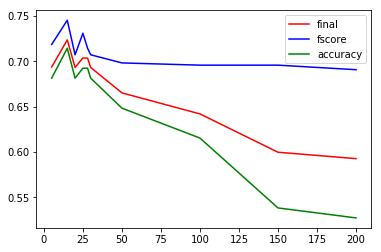

In [8]:
n_est=[5,15,20,25,28,30,50,100,150,200]
s=[]
fs=[]
acc=[]
for n in n_est:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    pre1=knn.predict(X_test)
    accuracy=knn.score(X_test,y_test)
    a=np.array(y_test)
    d=a.ravel()
    right=classifier(d,pre1)
    ans=precision_recall_fscore(right)
    ss=final(accuracy,ans[0],ans[2])
    acc+=[accuracy]
    fs+=[ans[2]]
    s+=[ss]
plt.plot(n_est,s,c='red',label='final')
plt.plot(n_est,fs,c='blue',label='fscore')
plt.plot(n_est,acc,c='green',label='accuracy')
plt.legend()

相對較高

In [9]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=20,learning_rate=0.2,random_state=123)
ada.fit(X_train,y_train)
pre2=ada.predict(X_test)
ada_tproba=ada.predict_proba(X_test)
accuracy=ada.score(X_test,y_test)
print(accuracy)
a=np.array(y_test)
d=a.ravel()
right=classifier(d,pre2)
ans=precision_recall_fscore(right)
print(ans)
s=final(accuracy,ans[0],ans[2])
s

0.8351648351648352
(0.8367346938775511, 0.8541666666666666, 0.845360824742268)


c:\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8397141886096231

c:\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

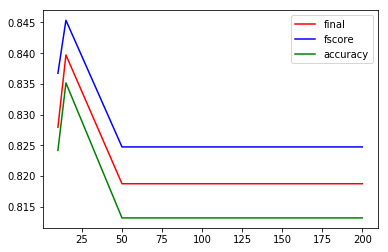

In [10]:
n_est=[10,15,50,100,150,200]
s=[]
fs=[]
acc=[]
for n in n_est:
    ada=AdaBoostClassifier(n_estimators=n,learning_rate=0.2,random_state=123)
    ada.fit(X_train,y_train)
    pre2=ada.predict(X_test)
    accuracy=ada.score(X_test,y_test)
    a=np.array(y_test)
    d=a.ravel()
    right=classifier(d,pre2)
    ans=precision_recall_fscore(right)
    ss=final(accuracy,ans[0],ans[2])
    acc+=[accuracy]
    fs+=[ans[2]]
    s+=[ss]
plt.plot(n_est,s,c='red',label='final')
plt.plot(n_est,fs,c='blue',label='fscore')
plt.plot(n_est,acc,c='green',label='accuracy')
plt.legend()

In [11]:
from sklearn.naive_bayes import GaussianNB
gau=GaussianNB(var_smoothing = 0)
gau.fit(X_train,y_train)
pre3=gau.predict(X_test)
gau_proba=gau.predict_proba(X_test)
accuracy=gau.score(X_test,y_test)
print(accuracy)
a=np.array(y_test)
d=a.ravel()
right=classifier(d,pre3)
ans=precision_recall_fscore(right)
print(ans)
s=final(accuracy,ans[0],ans[2])
s

0.8681318681318682
(0.875, 0.875, 0.875)


c:\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8729395604395604

In [22]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(n_estimators=15,random_state=123)
bag.fit(X_train,y_train)
pre4=bag.predict(X_test)
bag_tproba=bag.predict_proba(X_test)
accuracy=bag.score(X_test,y_test)
print(accuracy)
a=np.array(y_test)
d=a.ravel()
right=classifier(d,pre4)
ans=precision_recall_fscore(right)
print(ans)
s=final(accuracy,ans[0],ans[1])
s

0.8241758241758241
(0.8333333333333334, 0.8333333333333334, 0.8333333333333334)


c:\python37\lib\site-packages\sklearn\ensemble\bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8305860805860806

c:\python37\lib\site-packages\sklearn\ensemble\bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\ensemble\bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\ensemble\bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\ensemble\bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

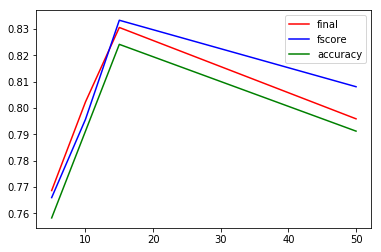

In [23]:
n_est=[5,10,15,50]
s=[]
fs=[]
acc=[]
for n in n_est:
    bag=BaggingClassifier(n_estimators=n,random_state=123)
    bag.fit(X_train,y_train)
    pre4=bag.predict(X_test)
    bag_tproba=bag.predict_proba(X_test)
    accuracy=bag.score(X_test,y_test)
    a=np.array(y_test)
    d=a.ravel()
    right=classifier(d,pre4)
    ans=precision_recall_fscore(right)
    ss=final(accuracy,ans[0],ans[2])
    acc+=[accuracy]
    fs+=[ans[2]]
    s+=[ss]
plt.plot(n_est,s,c='red',label='final')
plt.plot(n_est,fs,c='blue',label='fscore')
plt.plot(n_est,acc,c='green',label='accuracy')
plt.legend()

In [24]:
from sklearn.linear_model import RidgeClassifierCV
rid= RidgeClassifierCV()
rid.fit(X_train,y_train)
pre5=rid.predict(X_test)
accuracy=rid.score(X_test,y_test)
print(accuracy)
a=np.array(y_test)
d=a.ravel()
right=classifier(d,pre5)
ans=precision_recall_fscore(right)
s=final(accuracy,ans[0],ans[2])
s

0.8131868131868132


c:\python37\lib\site-packages\sklearn\linear_model\ridge.py:1419: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8213132668003889

In [25]:
from sklearn.ensemble import RandomForestClassifier
random_=RandomForestClassifier(n_estimators=10,random_state=123)
random_.fit(X_train,y_train)
pre6=random_.predict(X_test)
accuracy=random_.score(X_test,y_test)
print(accuracy)
a=np.array(y_test)
d=a.ravel()
right=classifier(d,pre6)
ans=precision_recall_fscore(right)
print(ans)
s=final(accuracy,ans[0],ans[2])
s

0.8681318681318682
(0.9090909090909091, 0.8333333333333334, 0.8695652173913043)


c:\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8809929201233548

c:\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
c:\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
c:\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
c:\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.8021978021978022
0.8681318681318682
0.8681318681318682
0.8351648351648352


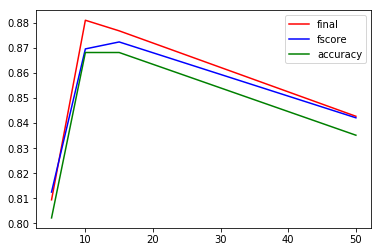

In [26]:
n_est=[5,10,15,50]
s=[]
fs=[]
acc=[]
for n in n_est:
    random_=RandomForestClassifier(n_estimators=n,random_state=123)
    random_.fit(X_train,y_train)
    pre6=random_.predict(X_test)
    accuracy=random_.score(X_test,y_test)
    print(accuracy)
    a=np.array(y_test)
    d=a.ravel()
    right=classifier(d,pre6)
    ans=precision_recall_fscore(right)
    ss=final(accuracy,ans[0],ans[2])
    acc+=[accuracy]
    fs+=[ans[2]]
    s+=[ss]
plt.plot(n_est,s,c='red',label='final')
plt.plot(n_est,fs,c='blue',label='fscore')
plt.plot(n_est,acc,c='green',label='accuracy')
plt.legend()

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(min_samples_split=2,random_state=54)
dtree.fit(X_train,y_train)
pre7=dtree.predict(X_test)
tree_tproba=dtree.predict_proba(X_test)
accuracy=dtree.score(X_test,y_test)
print(accuracy)   
a=np.array(y_test)
d=a.ravel()
right=classifier(d,pre7)
ans=precision_recall_fscore(right)
print(ans)
s=final(accuracy,ans[0],ans[2])
print(s)
from sklearn.metrics import classification_report
ss= classification_report(y_test,pre7)
ss 

0.7912087912087912
(0.7959183673469388, 0.8125, 0.8041237113402061)
0.7977876321028015


'              precision    recall  f1-score   support\n\n           0       0.79      0.77      0.78        43\n           1       0.80      0.81      0.80        48\n\n   micro avg       0.79      0.79      0.79        91\n   macro avg       0.79      0.79      0.79        91\nweighted avg       0.79      0.79      0.79        91\n'

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=100,learning_rate=0.2,random_state=12)
grad.fit(X_train,y_train)
pre8=grad.predict(X_test)
boost_tproba=grad.predict_proba(X_test)
accuracy=grad.score(X_test,y_test)
a=np.array(y_test)
d=a.ravel()
right=classifier(d,pre8)
ans=precision_recall_fscore(right)
print(ans)
s=final(accuracy,ans[0],ans[2])
s

(0.8333333333333334, 0.8333333333333334, 0.8333333333333334)


c:\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8305860805860806

c:\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

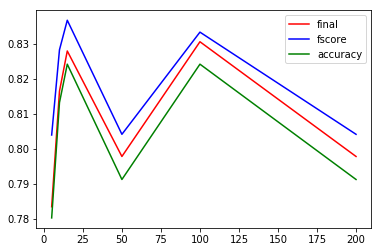

In [29]:
n_est=[5,10,15,50,100,200]
s=[]
fs=[]
acc=[]
for n in n_est:
    grad=GradientBoostingClassifier(n_estimators=n,learning_rate=0.2,random_state=12)
    grad.fit(X_train,y_train)
    pre8=grad.predict(X_test)
    boost_tproba=grad.predict_proba(X_test)
    accuracy=grad.score(X_test,y_test)
    a=np.array(y_test)
    d=a.ravel()
    right=classifier(d,pre8)
    ans=precision_recall_fscore(right)
    ss=final(accuracy,ans[0],ans[2])
    acc+=[accuracy]
    fs+=[ans[2]]
    s+=[ss]
plt.plot(n_est,s,c='red',label='final')
plt.plot(n_est,fs,c='blue',label='fscore')
plt.plot(n_est,acc,c='green',label='accuracy')
plt.legend()

In [30]:
print('ada:  ',pre2[50:80],ada_tproba[61])
print('gau:  ',pre3[50:80],gau_proba[61])
print('bag:  ',pre4[50:80],bag_tproba[61])
print('ran:  ',pre6[50:80])
print('dct:  ',pre7[50:80],tree_tproba[61])
print('boo:  ',pre8[50:80],boost_tproba[61])

ada:   [1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1] [0.6168892 0.3831108]
gau:   [1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0] [1.000000e+00 9.582532e-24]
bag:   [1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1] [0.82 0.18]
ran:   [1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1]
dct:   [1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0] [1. 0.]
boo:   [1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1] [0.99876962 0.00123038]


In [31]:
pre_tproba=((boost_tproba*2)+(ada_tproba*1)+(bag_tproba*3)+(tree_tproba*2)+(gau_proba*6))/14
pref=[]
for i in range(len(pre_tproba)):
    if pre_tproba[i][0]>pre_tproba[i][1]:
        pref.append(0)
    else:
        pref.append(1)
preff=np.array(pref)
print('this: ',preff[50:80],pre_tproba[61])
print('real: ',y_test[50:80])
a=np.array(y_test)
d=a.ravel()
right=classifier(d,pref)
accuracy=(right[0]+right[3])/sum(right)
print(accuracy)
ans=precision_recall_fscore(right)
s=final(accuracy,ans[0],ans[2])
s

this:  [1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0] [0.93388775 0.06611225]
real:       target
132       1
294       0
188       0
295       0
106       1
141       1
100       1
151       1
291       0
47        1
18        1
97        1
224       0
174       0
53        1
234       0
232       0
128       1
205       0
71        1
293       0
88        1
216       0
169       0
258       0
134       1
223       0
168       0
164       1
272       0
0.8571428571428571


0.8641081426971684